<img src="https://raw.githubusercontent.com/NesttorIvan/IA-Project/master/imgs/Banner1.png">

##Activación

Activar sincronizacion con Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Nos movemos al directorio que contiene el proyecto

In [2]:
%cd /content/drive/My Drive/IA-Project/03-Prototipo
!pwd

/content/drive/My Drive/IA-Project/03-Prototipo
/content/drive/My Drive/IA-Project/03-Prototipo


##Importacion

Importamos librerias necesarias para la ejecución del proyecto 

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA

Mostramos la información del dataset que vamos a tratar:

In [4]:
inf = pd.read_csv('../data/csv/Descripcion_campos.csv')
print(inf)

    Orden  ...                                        Descripcion
0       1  ...           0 Código de la estación de meteorológica
1       2  ...              1 Fecha de los datos de este registro
2       3  ...                          2 Temperatura máxima (ºC)
3       4  ...                           3 Temperatura media (ºC)
4       5  ...                          4 Temperatura mínima (ºC)
5       6  ...                      5 Humedad relativa máxima (%)
6       7  ...                       6 Humedad relativa media (%)
7       8  ...                      7 Humedad relativa mínima (%)
8       9  ...                        8 Radicación media (w*h/m2)
9      10  ...                                9 Lluvia total (mm)
10     11  ...               14 Velocidad de viento máxima (Km/h)
11     12  ...                15 Velocidad de viento media (Km/h)
12     13  ...               16 Velocidad de viento mínima (Km/h)
13     14  ...  17 Minutos con dirección de viento en el prime...
14     15 

Importamos dataset

In [5]:
df = pd.read_csv('../data/csv/rain2018.csv')
df.info() #Despliega la informacion del dataset
df.head() #Despliega la cabecera del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27139 entries, 0 to 27138
Data columns (total 18 columns):
cod_est                27139 non-null object
FECHA                  27139 non-null object
T_Max                  27065 non-null float64
T_Med                  27065 non-null float64
T_Min                  27065 non-null float64
H_R_Max                27099 non-null float64
H_R_Med                27099 non-null float64
H_R_Min                27099 non-null float64
PromedioDeRadiacion    27135 non-null float64
SumaDeLluvia           27108 non-null float64
V_Max                  25891 non-null float64
V_Med                  25891 non-null float64
V_Min                  25537 non-null float64
SumaDeCV1              27126 non-null float64
SumaDeCV2              27126 non-null float64
SumaDeCV3              27126 non-null float64
SumaDeCV4              27126 non-null float64
PromedioDeDireccion    27139 non-null float64
dtypes: float64(16), object(2)
memory usage: 3.7+ MB


,cod_est,FECHA,T_Max,T_Med,T_Min,H_R_Max,H_R_Med,H_R_Min,PromedioDeRadiacion,SumaDeLluvia,V_Max,V_Med,V_Min,SumaDeCV1,SumaDeCV2,SumaDeCV3,SumaDeCV4,PromedioDeDireccion
0,AL001,2018-01-01T00:00:00,19.79,13.777292,6.580,95.5,60.447917,34.90,0.398377,0.0,22.05,4.615417,0.0,641.0,83.0,660.0,54.0,1.958333
1,AL001,2018-01-02T00:00:00,22.94,12.521917,6.884,95.7,73.805000,39.27,0.399396,0.0,15.75,2.813667,0.0,820.0,99.0,497.0,20.0,1.708333
2,AL001,2018-01-03T00:00:00,20.22,12.792875,7.349,99.5,78.872083,53.54,0.391564,0.0,20.70,3.569625,0.0,696.0,69.0,675.0,0.0,1.958333
3,AL001,2018-01-04T00:00:00,19.82,12.559458,6.842,100.0,91.754583,65.57,0.401134,0.2,19.35,3.878833,0.0,490.0,241.0,707.0,1.0,2.166667
4,AL001,2018-01-05T00:00:00,18.37,13.768750,10.680,100.0,89.478750,64.32,0.391359,0.2,20.70,4.108833,0.0,612.0,154.0,667.0,6.0,2.041667


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe90a7f908>,
      dtype=object)

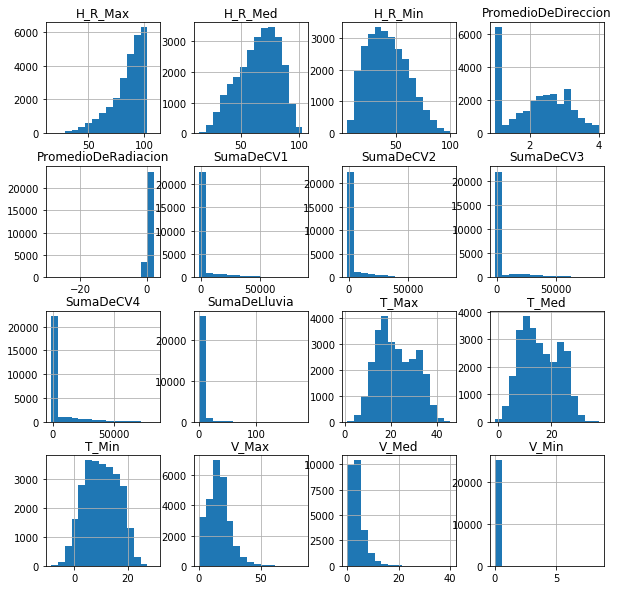

In [6]:
df.hist(bins=15, figsize=(10,10))

##Preprocesamiento de datos

Eliminamos las columnas que no nos son de utilidad para limpiar el dataset y reindexamos por fecha

In [7]:
print(type(df))
del df['cod_est']
del df['V_Min']
del df['SumaDeLluvia']
del df['SumaDeCV1']
del df['SumaDeCV2']
del df['SumaDeCV3']
del df['SumaDeCV4']
df['FECHA'] = pd.to_datetime(df['FECHA']) #Se convierte la fecha a formato de tiempo
df.set_index('FECHA', inplace=True) #Utilizamos la fecha como indice
df.dropna(inplace = True) #Elimina campos vacios
df.head()

<class 'pandas.core.frame.DataFrame'>


,T_Max,T_Med,T_Min,H_R_Max,H_R_Med,H_R_Min,PromedioDeRadiacion,V_Max,V_Med,PromedioDeDireccion
FECHA,,,,,,,,,,
2018-01-01,19.79,13.777292,6.580,95.5,60.447917,34.90,0.398377,22.05,4.615417,1.958333
2018-01-02,22.94,12.521917,6.884,95.7,73.805000,39.27,0.399396,15.75,2.813667,1.708333
2018-01-03,20.22,12.792875,7.349,99.5,78.872083,53.54,0.391564,20.70,3.569625,1.958333
2018-01-04,19.82,12.559458,6.842,100.0,91.754583,65.57,0.401134,19.35,3.878833,2.166667
2018-01-05,18.37,13.768750,10.680,100.0,89.478750,64.32,0.391359,20.70,4.108833,2.041667


##Despliegue grafico

Hacemos el histograma de cada columna

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbe8feaa9b0>,
      dtype=object)

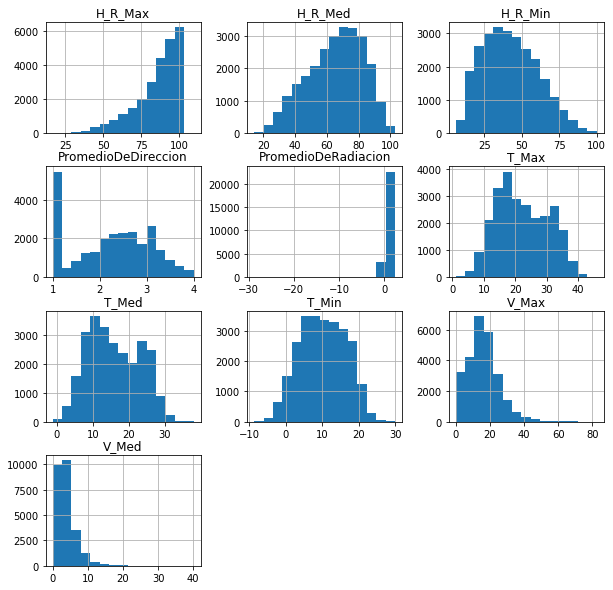

In [8]:
df.hist(bins=15, figsize=(10,10))

Miramos la correlación que tienen las columnas del dataset

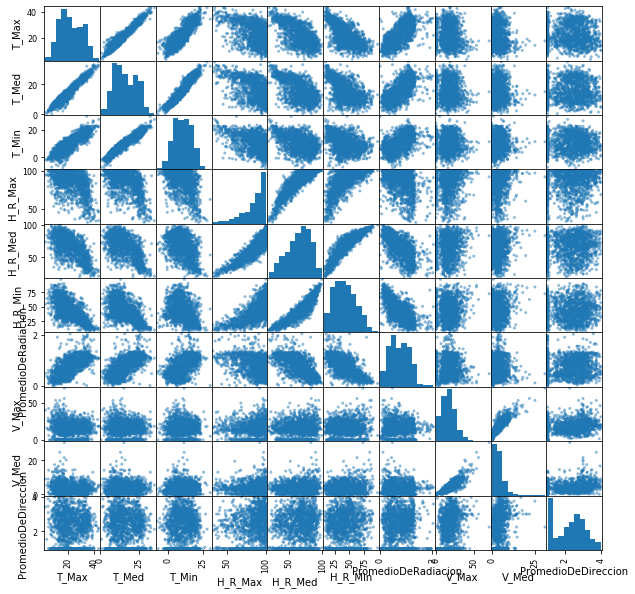

In [9]:
pd.plotting.scatter_matrix(df.sample(1500), figsize=(10,10));

#Procesamiento de datos

Pasamos el dataframe a un arreglo Numpy, lo permutamos para asegurarnos de tomar muestras aleatorias y definimos nuestras características (X) y etiquetas (y).

In [10]:
val = np.random.permutation(df.values)
X = val[:,[0,1,2,3,4,5,6,8,9]]
y = val[:,6]
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))


(25822, 9)
<class 'numpy.ndarray'>
(25822,)
<class 'numpy.ndarray'>


Miramos cuales son los valores maximos y minimos de cada columna.

In [11]:
maximo = df.max(axis = 0 )
minimo = df.min(axis = 0)
print('Maximos de cada columna:\n',maximo)
print('\nMinimos de cada columna:\n',minimo)

Maximos de cada columna:
 T_Max                   45.930000
T_Med                   37.929286
T_Min                   29.930000
H_R_Max                109.400000
H_R_Med                102.975000
H_R_Min                100.000000
PromedioDeRadiacion      2.370331
V_Max                   82.500000
V_Med                   40.095000
PromedioDeDireccion      4.000000
dtype: float64

Minimos de cada columna:
 T_Max                   0.996000
T_Med                  -1.210083
T_Min                  -8.710000
H_R_Max                16.660000
H_R_Med                14.137917
H_R_Min                 5.737000
PromedioDeRadiacion   -28.796400
V_Max                   0.000000
V_Med                   0.000000
PromedioDeDireccion     1.000000
dtype: float64


**PCA**

In [0]:
#X = PCA(n_components=4).fit_transform(X)

Definimos nuestros valores para entrenamiento y prueba, y el tamaño de cada uno

In [13]:
X = X.astype('float32')#Lo pasamos a flotantes
y = y.astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(18075, 9) (18075,) (7747, 9) (7747,)


#Machine Learning

## 1. SVM:

Vamos a medir cual sería la mejor configuracion de maximo de iteraciones para éste estimador.

In [0]:
def show_curve_SVR(nfold, max_iter_range):
    means, stds = [], []
    si=1
    for iter in max_iter_range:
        s = cross_val_score(SVR(max_iter=iter), X, y, cv=KFold(nfold, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))
        if np.mean(s)<si:
          BestIter = iter
          si = np.mean(s) 
    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(max_iter_range, means, label="mean", color="black")
    plt.fill_between(max_iter_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("Max Iter")
    plt.ylabel("performance")
    plt.legend()

    return BestIter

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=40).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=40).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=40).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=40).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:

La mejor configuracion para el maximo de iteraciones es:  96


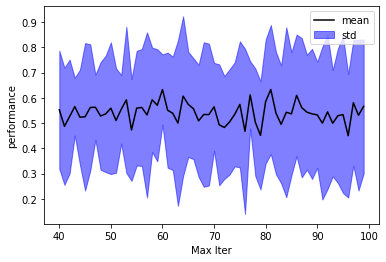

In [15]:
nfold = 10
max_iter_range = range(40,100)
BestIter=show_curve_SVR(nfold, max_iter_range)
print ("La mejor configuracion para el maximo de iteraciones es: ", BestIter)

Definir un objeto de tipo SVM

In [16]:
#Se aplica SVR
est_SV = SVR()
s = cross_val_score(est_SV, X, y, cv=KFold(nfold, shuffle=True), scoring=make_scorer(mean_squared_error))
print("MSE %.6f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE 0.073567 (+/- 0.07117)


Entrenamos nuestro modelo, y hacemos las predicciones

In [0]:
est_SV.fit(X_train, y_train)
predic_SV = est_SV.predict(X_test)

Graficamos las predicciones con el test, para saber el nivel de precisión de nuestro modelo.

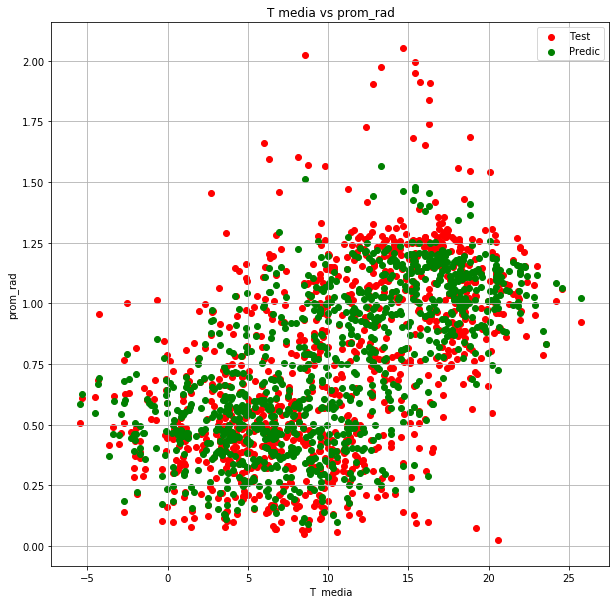

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(X_test[:1001,2], y_test[:1001], color = "red")
plt.scatter(X_test[:1001,2], predic_SV[:1001], color = "green")
plt.title("T media vs prom_rad")
plt.grid()
plt.legend(labels=['Test','Predic'])
plt.xlabel("T  media")
plt.ylabel("prom_rad")
plt.show()

## 2. Decision tree:

Vamos a medir cual sería la mejor configuracion de profundidad para éste estimador

In [0]:
def show_curve_DTR(nfold, nTree_Range):
    means, stds = [], []
    si = 1
    for nTree in nTree_Range:
        s = cross_val_score(DecisionTreeRegressor(max_depth=nTree), X, y, cv=KFold(nfold, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))
        if np.mean(s)<si:
          BestTree = nTree
          si = np.mean(s)        
    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nTree_Range, means, label="mean", color="black")
    plt.fill_between(nTree_Range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n Tree")
    plt.ylabel("performance")
    plt.legend()

    return BestTree

La mejor configuración para la profundidad del arbol es:  46


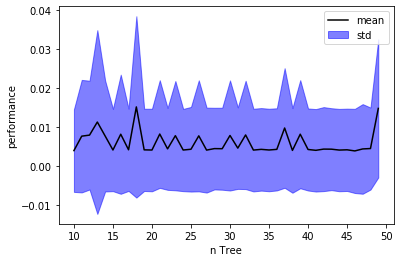

In [20]:
nfold = 10
nTree_Range = range(10,50)
BestTree = show_curve_DTR(nfold, nTree_Range)
print ("La mejor configuración para la profundidad del arbol es: ", BestTree)

Definir un objeto de tipo DecisionTreeRegressor

In [21]:
#Se aplica decision tree
est_DT = DecisionTreeRegressor(max_depth=BestTree)
s = cross_val_score(est_DT, X, y, cv=KFold(nfold, shuffle=True), scoring=make_scorer(mean_squared_error))
print("MSE %.6f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE 0.003996 (+/- 0.01067)


Entrenamos nuestro modelo, y hacemos las predicciones

In [0]:
est_DT.fit(X_train, y_train)
predic_DT = est_DT.predict(X_test)

Graficamos las predicciones con el test, para saber el nivel de precisión de nuestro modelo.

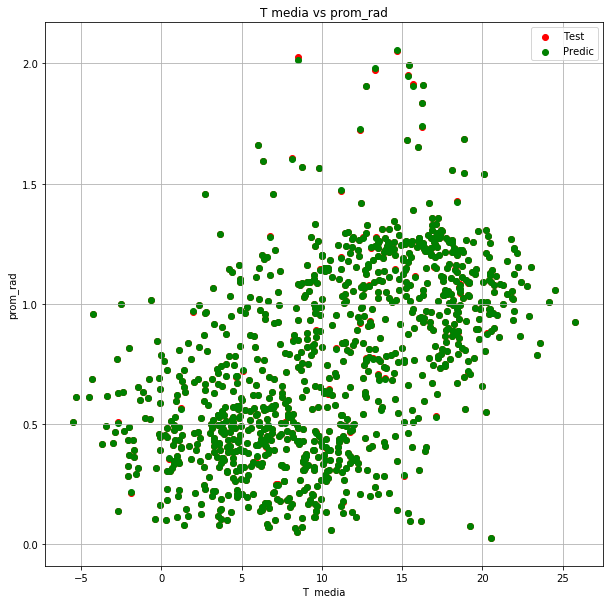

In [23]:
plt.figure(figsize=(10,10))
plt.scatter(X_test[:1001,2], y_test[:1001], color = "red")
plt.scatter(X_test[:1001,2], predic_DT[:1001], color = "green")
plt.grid()
plt.legend(labels=['Test','Predic'])
plt.title("T media vs prom_rad")
plt.xlabel("T  media")
plt.ylabel("prom_rad")
plt.show()

## 3. Random Forest:


Vamos a medir cual sería la mejor configuracion de profundidad para éste estimador

In [0]:
def show_curve_RFR(nfold, nTree_Range):
    means, stds = [], []
    si = 1
    for nTree in nTree_Range:
        print (nTree),
        s = cross_val_score(RandomForestRegressor(max_depth=nTree), X, y, cv=KFold(nfold, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))
        if np.mean(s)<si:
          BestTree = nTree
          si = np.mean(s)   

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nTree_Range, means, label="mean", color="black")
    plt.fill_between(nTree_Range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n Tree")
    plt.ylabel("performance")
    plt.legend()

    return BestTree

In [0]:
# nfold = 10
# nTree_Range = range(1,10)
# BestTree = show_curve_RFR(nfold, nTree_Range)
# print ("La mejor configuración para la profundidad del arbol es: ", BestTree)

Definir un objeto de tipo RandomForestRegressor

In [26]:
est_RF= RandomForestRegressor(max_depth = 9)
s = cross_val_score(est_RF, X, y, cv=KFold(nfold, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE %.6f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE 0.004422 (+/- 0.01050)


Entrenamos nuestro modelo, y hacemos las predicciones

In [0]:
est_RF.fit(X_train, y_train)
predic_RF = est_RF.predict(X_test)

Graficamos las predicciones con el test, para saber el nivel de precisión de nuestro modelo.

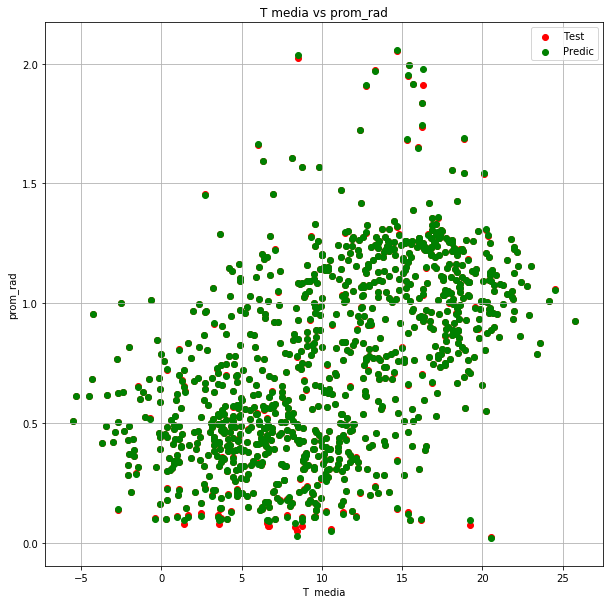

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(X_test[:1001,2], y_test[:1001], color = "red")
plt.scatter(X_test[:1001,2], predic_RF[:1001], color = "green")
plt.grid()
plt.legend(labels=['Test','Predic'])
plt.title("T media vs prom_rad")
plt.xlabel("T  media")
plt.ylabel("prom_rad")
plt.show()

# Deep learning

In [29]:
model = keras.models.Sequential([ #keras de modelo secuencial, solo se definen las capas
    keras.layers.InputLayer( input_shape=[9]),#
    keras.layers.Dense(512, activation=tf.nn.relu),#capa escondida
    keras.layers.Dense(256, activation=tf.nn.relu),#capa escondida
    keras.layers.Dense(128, activation=tf.nn.relu),#capa escondida
    keras.layers.Dense(1, activation='linear')#Si se desea que sea regresion la ultima capa es una sola neurona y con activacion linear
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 169,473
Trainable params: 169,473
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), #Gradiente estocastico  
              loss='mse',#Regla de minimizacion
              metrics=['mse'])#Mide el mean_squared_error

In [32]:
history = model.fit(X_train, y_train, epochs=15,validation_data=(X_test, y_test) ,verbose = 1)

Train on 18075 samples, validate on 7747 samples
Epoch 1/15
18075/18075 [==============================] - 4s 218us/sample - loss: 0.6316 - mean_squared_error: 0.6316 - val_loss: 0.2050 - val_mean_squared_error: 0.2050
Epoch 2/15
18075/18075 [==============================] - 2s 132us/sample - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 3/15
18075/18075 [==============================] - 2s 133us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 4/15
18075/18075 [==============================] - 2s 131us/sample - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch 5/15
18075/18075 [==============================] - 2s 132us/sample - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch 6/15
18075/18075 [==============================] - 2s 135us/sample - loss: 0.0325 - mean_squar

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test)

7747/7747 [==============================] - 0s 58us/sample - loss: 0.0328 - mean_squared_error: 0.0328


In [0]:
predic_DL = model.predict(X_test)

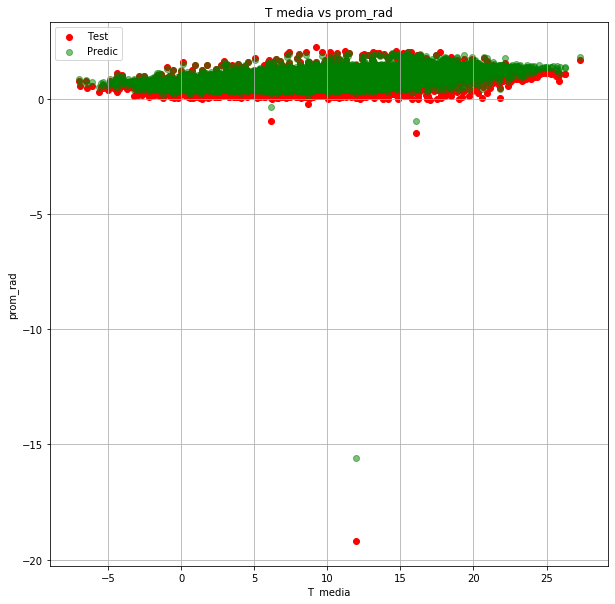

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(X_test[:,2], y_test, color = "red")
plt.scatter(X_test[:,2], predic_DL, color = "green", alpha = .5)
plt.title("T media vs prom_rad")
plt.grid()
plt.legend(labels=['Test','Predic'])
plt.xlabel("T  media")
plt.ylabel("prom_rad")
plt.show()

# Prueba con un dataset diferente

Cargamos el nuevo dataset:

In [36]:
df2 = pd.read_csv('../data/csv/rain2019.csv')
df2.info() #Despliega la informacion del dataset
df2.head() #Despliega la cabecera del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13396 entries, 0 to 13395
Data columns (total 18 columns):
cod_est                13396 non-null object
FECHA                  13396 non-null object
T_Max                  13382 non-null float64
T_Med                  13382 non-null float64
T_Min                  13382 non-null float64
H_R_Max                13385 non-null float64
H_R_Med                13385 non-null float64
H_R_Min                13385 non-null float64
PromedioDeRadiacion    13388 non-null float64
SumaDeLluvia           13345 non-null float64
V_Max                  12850 non-null float64
V_Med                  12850 non-null float64
V_Min                  12657 non-null float64
SumaDeCV1              13386 non-null float64
SumaDeCV2              13386 non-null float64
SumaDeCV3              13386 non-null float64
SumaDeCV4              13386 non-null float64
PromedioDeDireccion    13396 non-null float64
dtypes: float64(16), object(2)
memory usage: 1.8+ MB


,cod_est,FECHA,T_Max,T_Med,T_Min,H_R_Max,H_R_Med,H_R_Min,PromedioDeRadiacion,SumaDeLluvia,V_Max,V_Med,V_Min,SumaDeCV1,SumaDeCV2,SumaDeCV3,SumaDeCV4,PromedioDeDireccion
0,AL001,2019-01-01T00:00:00,18.03,8.880042,2.370,94.9,69.756667,29.35,0.399086,0.0,16.20,3.021750,0.0,389.0,509.0,542.0,0.0,2.166667
1,AL001,2019-01-02T00:00:00,15.94,8.196292,1.488,96.2,83.562500,65.16,0.389498,0.0,18.00,3.448000,0.0,129.0,861.0,438.0,9.0,2.291667
2,AL001,2019-01-03T00:00:00,16.55,10.837417,6.040,92.7,74.906667,55.78,0.336150,0.0,20.70,6.000250,0.0,812.0,628.0,0.0,0.0,1.375000
3,AL001,2019-01-04T00:00:00,16.65,8.234125,3.135,95.4,81.607500,51.56,0.376608,0.0,11.70,1.950750,0.0,861.0,481.0,95.0,2.0,1.458333
4,AL001,2019-01-05T00:00:00,15.23,7.447917,1.825,93.1,80.821667,51.06,0.403922,0.0,17.55,3.652042,0.0,829.0,87.0,516.0,7.0,1.791667


Hacemos el preprocesamiento de datos:

In [37]:
print(type(df2))
del df2['cod_est']
del df2['V_Min']
del df2['SumaDeLluvia']
del df2['SumaDeCV1']
del df2['SumaDeCV2']
del df2['SumaDeCV3']
del df2['SumaDeCV4']
df2['FECHA'] = pd.to_datetime(df2['FECHA']) #Se convierte la fecha a formato de tiempo
df2.set_index('FECHA', inplace=True) #Utilizamos la fecha como indice
df2.dropna(inplace = True) #Elimina campos vacios
df2.head()

<class 'pandas.core.frame.DataFrame'>


,T_Max,T_Med,T_Min,H_R_Max,H_R_Med,H_R_Min,PromedioDeRadiacion,V_Max,V_Med,PromedioDeDireccion
FECHA,,,,,,,,,,
2019-01-01,18.03,8.880042,2.370,94.9,69.756667,29.35,0.399086,16.20,3.021750,2.166667
2019-01-02,15.94,8.196292,1.488,96.2,83.562500,65.16,0.389498,18.00,3.448000,2.291667
2019-01-03,16.55,10.837417,6.040,92.7,74.906667,55.78,0.336150,20.70,6.000250,1.375000
2019-01-04,16.65,8.234125,3.135,95.4,81.607500,51.56,0.376608,11.70,1.950750,1.458333
2019-01-05,15.23,7.447917,1.825,93.1,80.821667,51.06,0.403922,17.55,3.652042,1.791667


In [38]:
val = np.random.permutation(df2.sample(1000).values) # Se toman 1000 para el ejemplo
X2 = val[:,[0,1,2,3,4,5,6,8,9]]
y2 = val[:,6]
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

(25822, 9)
<class 'numpy.ndarray'>
(25822,)
<class 'numpy.ndarray'>


Predecimos los valores de X del nuevo dataset:

In [0]:
pred_2019 = est_RF.predict(X2)

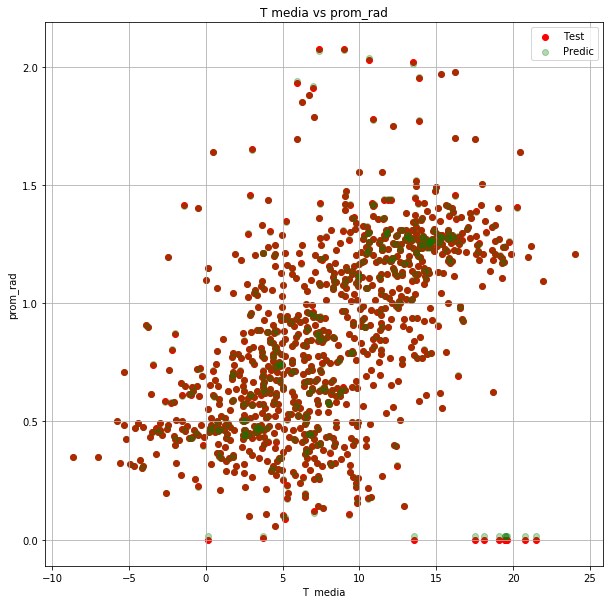

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(X2[:,2], y2, color = "red")
plt.scatter(X2[:,2], pred_2019, color = "green", alpha = 0.3)
plt.grid()
plt.legend(labels=['Test','Predic'])
plt.title("T media vs prom_rad")
plt.xlabel("T  media")
plt.ylabel("prom_rad")
plt.show()

In [41]:
s1 = cross_val_score(est_RF, X2, y2, cv=KFold(nfold, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE %.6f (+/- %.5f)"%(np.mean(s1), np.std(s1)))

MSE 0.000034 (+/- 0.00003)


# Niveles de radiacion

In [0]:
# pred_2019T = np.transpose(pred_2019, axes=0)
# print (pred_2019T.shape)

In [0]:
Rad = []
for i in pred_2019:
  #Minimo
  if (i<=0.468):
    temp = 0
    Rad.append(temp)
  #Bajo
  elif (i<=0.936 and i>0.468):
    temp = 1
    Rad.append(temp)
  #Moderado
  elif (i<=1.404 and i>0.936):
    temp = 2
    Rad.append(temp)
  #Alto
  elif (i<=1.872 and i>1.404):
    temp = 3
    Rad.append(temp)
  #Muy alto
  elif (i<=2.34 and i>1.872):
    temp = 4
    Rad.append(temp)
  #Extremo
  elif (i>=2.34):
    temp = 5
    Rad.append(temp)


In [48]:
Pred_Riesgo = np.zeros(shape=(1000,2))
Pred_Riesgo[:,0] =  pred_2019
Pred_Riesgo[:,1] =  Rad
print(Pred_Riesgo[:20])

[[0.9662746  2.        ]
 [1.36174811 2.        ]
 [1.09497314 2.        ]
 [0.09653657 0.        ]
 [1.36193301 2.        ]
 [0.76749593 1.        ]
 [0.89788039 1.        ]
 [0.42407234 0.        ]
 [1.17695357 2.        ]
 [1.2476236  2.        ]
 [0.7361689  1.        ]
 [1.31031005 2.        ]
 [1.23255193 2.        ]
 [1.05541306 2.        ]
 [1.22294357 2.        ]
 [0.91542234 1.        ]
 [0.43496548 0.        ]
 [0.39835896 0.        ]
 [0.93325419 1.        ]
 [1.22033662 2.        ]]
